In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
fraud = pd.read_csv('Fraud_check.csv')
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [12]:
fraud.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [13]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [15]:
fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [16]:
fraud.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [19]:
fraud.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [24]:
fraud["TaxInc"] = pd.cut(fraud["Taxable.Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])
fraud["TaxInc"]

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: TaxInc, Length: 600, dtype: category
Categories (2, object): ['Risky' < 'Good']

In [30]:
fraud_check = fraud.drop(columns=["Taxable.Income"])
fraud_check 

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,TaxInc
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good
...,...,...,...,...,...,...
595,YES,Divorced,39492,7,YES,Good
596,YES,Divorced,55369,2,YES,Good
597,NO,Divorced,154058,0,YES,Good
598,YES,Married,180083,17,NO,Good


In [41]:
FC = pd.get_dummies(fraud_check .drop(columns = ["TaxInc"]))

In [47]:
Fraud_final = pd.concat([FC,fraud_check ["TaxInc"]], axis = 1)


In [50]:
col = list(Fraud_final.columns)
col

['City.Population',
 'Work.Experience',
 'Undergrad_NO',
 'Undergrad_YES',
 'Marital.Status_Divorced',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_NO',
 'Urban_YES',
 'TaxInc']

In [58]:
predictors = col[:9]
predictors

['City.Population',
 'Work.Experience',
 'Undergrad_NO',
 'Undergrad_YES',
 'Marital.Status_Divorced',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_NO',
 'Urban_YES']

In [60]:
target = col[9]
target

'TaxInc'

In [70]:
X = Fraud_final[predictors]
X.shape

(600, 9)

In [74]:
Y = Fraud_final[target]
Y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: TaxInc, Length: 600, dtype: category
Categories (2, object): ['Risky' < 'Good']

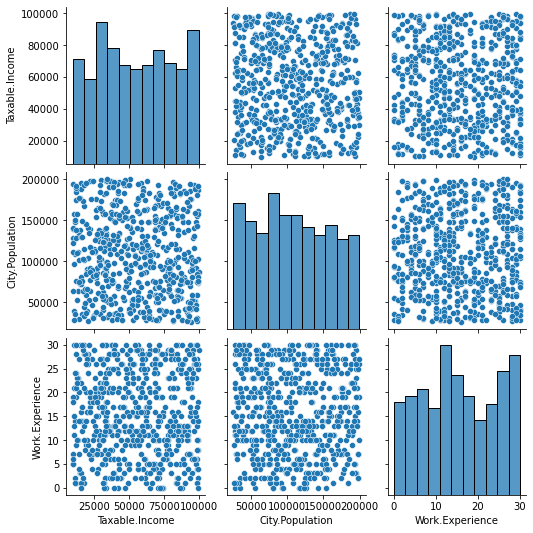

In [77]:
sns.pairplot(fraud)

C:\Users\Gpree\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Taxable.Income', ylabel='City.Population'>

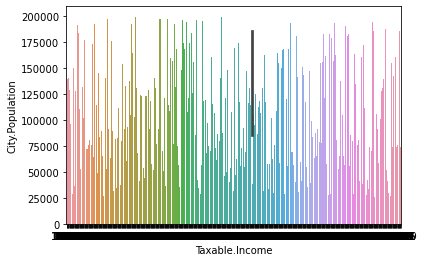

In [83]:
sns.barplot(fraud['Taxable.Income'], fraud['City.Population'])


C:\Users\Gpree\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Taxable.Income', ylabel='City.Population'>

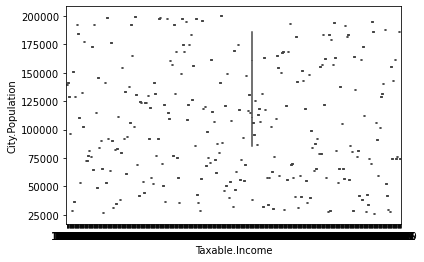

In [90]:
sns.boxplot(fraud['Taxable.Income'], fraud['City.Population'])

C:\Users\Gpree\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


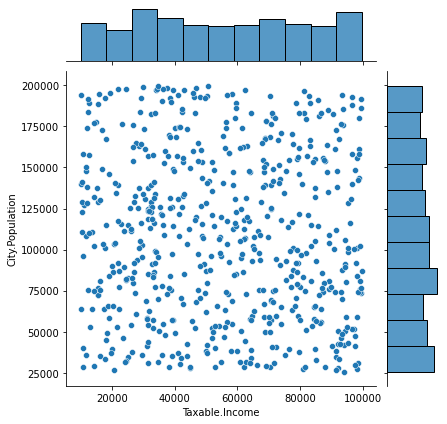

In [100]:
sns.jointplot(fraud['Taxable.Income'], fraud['City.Population'])

C:\Users\Gpree\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Taxable.Income', ylabel='City.Population'>

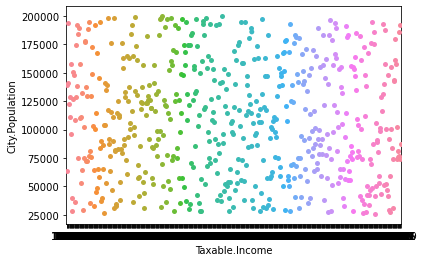

In [108]:
sns.stripplot(fraud['Taxable.Income'], fraud['City.Population'])

C:\Users\Gpree\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Taxable.Income', ylabel='Density'>

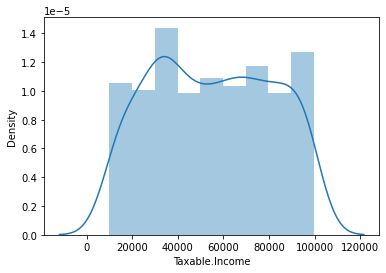

In [118]:
sns.distplot(fraud['Taxable.Income'])

C:\Users\Gpree\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='City.Population', ylabel='Density'>

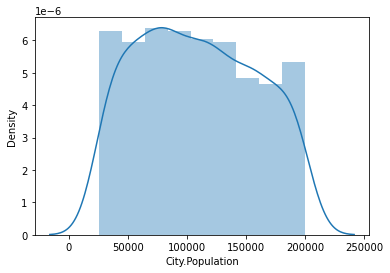

In [128]:
sns.distplot(fraud['City.Population'])

In [129]:
from sklearn.ensemble import RandomForestClassifier


In [138]:
rf = RandomForestClassifier(n_jobs = 3, oob_score = True, n_estimators = 15, criterion = "entropy")

In [149]:
rf = RandomForestClassifier(n_jobs=3,oob_score=True,n_estimators=15,criterion="entropy")

In [152]:
np.shape(Fraud_final)  

(600, 10)

In [158]:
Fraud_final.describe()

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,108747.368333,15.558333,0.480000,0.520000,0.315000,0.323333,0.361667,0.496667,0.503333
std,49850.075134,8.842147,0.500017,0.500017,0.464903,0.468139,0.480884,0.500406,0.500406
min,25779.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,66966.750000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,106493.500000,15.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,150114.250000,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,199778.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [159]:
X

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,50047,10,1,0,0,0,1,0,1
1,134075,18,0,1,1,0,0,0,1
2,160205,30,1,0,0,1,0,0,1
3,193264,15,0,1,0,0,1,0,1
4,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
595,39492,7,0,1,1,0,0,0,1
596,55369,2,0,1,1,0,0,0,1
597,154058,0,1,0,1,0,0,0,1
598,180083,17,0,1,0,1,0,1,0


In [160]:
Y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: TaxInc, Length: 600, dtype: category
Categories (2, object): ['Risky' < 'Good']

In [162]:
Y1 = pd.DataFrame(Y)
Y1

,TaxInc
0,Good
1,Good
2,Good
3,Good
4,Good
...,...
595,Good
596,Good
597,Good
598,Good


In [164]:
rf.fit(X,Y1) 

<ipython-input-164-1491c4d8d3cb>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X,Y1)


RandomForestClassifier(criterion='entropy', n_estimators=15, n_jobs=3,
                       oob_score=True)

In [167]:
rf.estimators_ 

[DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=159731778),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1516981352),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=44720148),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1635494583),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=870271657),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1260087422),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1540602845),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=922730639),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
           

In [168]:
rf.classes_ 

array(['Good', 'Risky'], dtype=object)

In [169]:
rf.n_classes_  

2

In [170]:
rf.n_features_  

9

In [171]:
rf.n_outputs_ 

1

In [173]:
rf.oob_score_  

0.7333333333333333

In [179]:
rf.predict(X)

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', '

In [181]:
Fraud_final['rf_pred'] = rf.predict(X)

In [185]:
cols = ['rf_pred','TaxInc']

In [188]:
Fraud_final[cols].head()

,rf_pred,TaxInc
0,Good,Good
1,Good,Good
2,Good,Good
3,Good,Good
4,Good,Good


In [192]:
Fraud_final["TaxInc"]

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: TaxInc, Length: 600, dtype: category
Categories (2, object): ['Risky' < 'Good']

In [193]:
from sklearn.metrics import confusion_matrix

In [197]:
confusion_matrix(Fraud_final['TaxInc'],Fraud_final['rf_pred'])

array([[476,   0],
       [ 10, 114]], dtype=int64)

In [202]:
pd.crosstab(Fraud_final['TaxInc'],Fraud_final['rf_pred'])

rf_pred,Good,Risky
TaxInc,,
Risky,10,114
Good,476,0


In [206]:
print("Accuracy",(476+115)/(476+115+9+0)*100)

Accuracy 98.5


In [210]:
Fraud_final["rf_pred"]

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: rf_pred, Length: 600, dtype: object